In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

class BaryInterp(object):
    def __init__(self,x,f,weights=None):
        self.x = x
        self.f = f
        self.weights = np.zeros(len(x))
        if weights is not None: self.weights = weights  #from the optional argument
        else: self.calc_weights()
        
    
  ##TO BE TAKEN CARE OF  
    def update(self,x_update,f_update):
        self.x = np.append(self.x,x_update)
        self.f = np.append(self.f,f_update)
        sort_ind = np.argsort(self.x)
        self.x = np.sort(self.x)
        self.f = self.f[sort_ind]
        self.weights = np.zeros(len(x))
    
    def calc_weights(self):
        N = len(self.x)
        W = np.ones([N,N])
        for i in range(1,len(self.x)):
            W[i,:i] = self.x[:i] - self.x[i]
            W[i,i] = ((-1)**i)*np.prod(W[i,:i])

        W[N-1,:] = np.prod(W,axis=0)
        self.weights = (1.0/W)[-1,:]
    
    def interp_lagrange(self,x_arg):

        interp_eval = np.zeros(len(x_arg))

        for i in range(len(x_arg)):    
            if(np.amin(np.abs(x_arg[i] - self.x)) == 0): interp_eval[i] = self.f[np.argmin(np.abs(x_arg[i] - self.x))]
            else: interp_eval[i] += np.sum((self.weights[:]*self.f[:]/(x_arg[i] - self.x[:])))/np.sum((self.weights[:]/(x_arg[i] - self.x[:])))
        return interp_eval

    
def chebweights1(nodes):  #only takes the nodes
    return ((-1)**np.array(range(len(nodes))))*np.sqrt(1 - nodes**2)  #computing sin from cos
    
def chebweights2(N_nodes):  #only takes number of nodes
    N = N_nodes - 1
    weights = np.zeros(N_nodes)
    weights[1:-1] = (-1)**np.arange(1,N,1)
    weights[0] = 0.5
    weights[-1] = 0.5*(-1)**N
    
    return weights
    


In [2]:
import numpy.polynomial.chebyshev as cheb

N_nodes = 100

nodes_cheb1 = cheb.chebpts1(N_nodes)

weights_cheb1 = chebweights1(nodes_cheb1)

nodes_cheb2 = cheb.chebpts2(N_nodes)

weights_cheb2 = chebweights2(len(nodes_cheb2))

f = lambda x: np.exp(x)

b_cheb1 = BaryInterp(nodes_cheb1,f(nodes_cheb1),weights_cheb1)

b_cheb1 = BaryInterp(nodes_cheb2,f(nodes_cheb2),weights_cheb2)

#plt.plot(nodes_cheb1,nodes_cheb2)
#plt.plot(weights_cheb1,weights_cheb2,'.')
#np.arange(1,N_nodes-1,1)

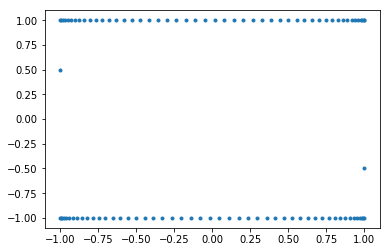

In [3]:
import numpy.polynomial.chebyshev as cheb

N_nodes = 100  #N+1 chebyshev nodes

nodes_cheb1 = cheb.chebpts1(N_nodes)  #array of N+1 nodes of 1st kind

weights_cheb1 = chebweights1(nodes_cheb1)  #corresponding weights for 1st kind

nodes_cheb2 = cheb.chebpts2(N_nodes)  #array of N+1 nodes of 2nd kind

weights_cheb2 = chebweights2(len(nodes_cheb2))  ##corresponding weights if 2nd kind

#plt.plot(nodes_cheb1, weights_cheb1, '.')
plt.plot(nodes_cheb2, weights_cheb2, '.')


Exponential function
1/(1 + 25*x^2)


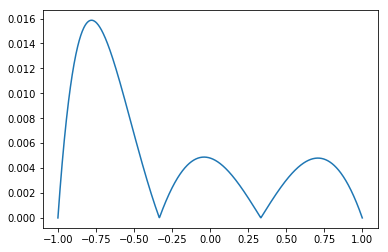

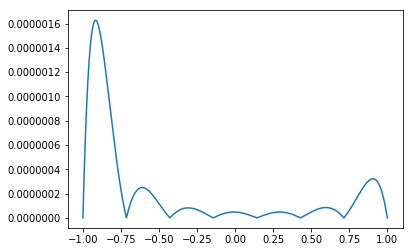

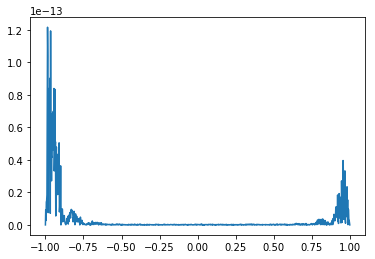

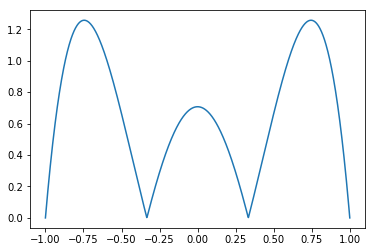

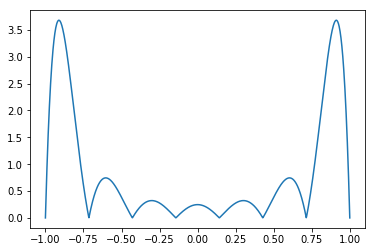

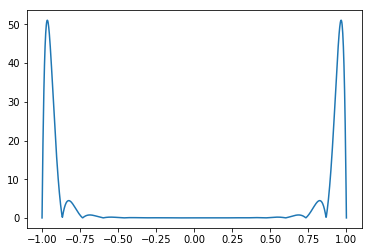

In [4]:
import numpy as np

node_list = [4,8,16]  #array containing the number of nodes for successive tests

x_interp = np.linspace(-1,1,1001)  #domain inclusive of -1 and +1

print('Exponential function')

for N_nodes in node_list:
    x = np.linspace(-1,1,N_nodes) #constructing equally spaced nodes with -1 and +1
    
    b = BaryInterp(x,np.exp(x))
    
    plt.figure()
    plt.plot(x_interp, np.abs(np.exp(x_interp) - b.interp_lagrange(x_interp))/np.exp(x_interp))
    
print('1/(1 + 25*x^2)')
    
for N_nodes in node_list:
    x = np.linspace(-1,1,N_nodes) #constructing equally spaced nodes with -1 and +1
    
    b = BaryInterp(x,1.0/(1.0 + 25.0*(x**2)))
    
    plt.figure()
    plt.plot(x_interp, np.abs(1.0/(1 + 25.0*(x_interp**2)) - b.interp_lagrange(x_interp))/(1.0/(1 + 25.0*(x_interp**2))))


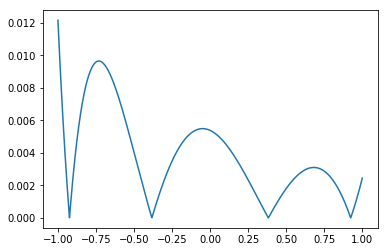

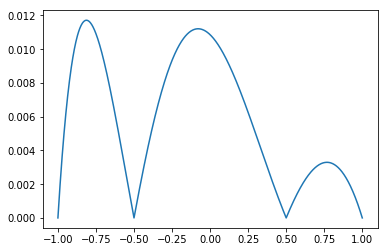

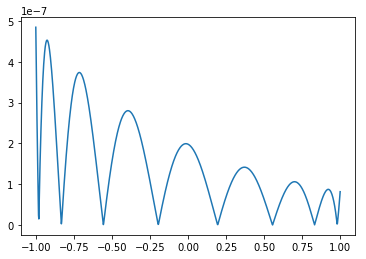

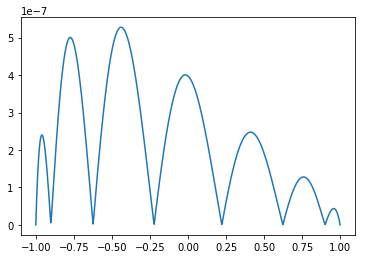

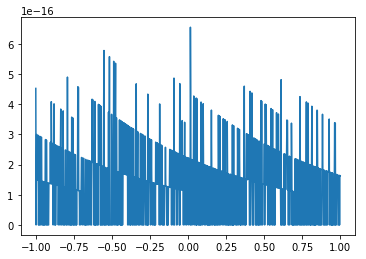

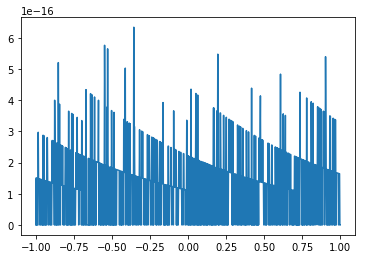

In [5]:
import numpy.polynomial.chebyshev as cheb

nodes_list = [4,8,16]

x_interp = np.linspace(-1,1,1001)

for N_nodes in nodes_list:

    nodes_cheb1 = cheb.chebpts1(N_nodes)

    weights_cheb1 = chebweights1(nodes_cheb1)

    nodes_cheb2 = cheb.chebpts2(N_nodes)

    weights_cheb2 = chebweights2(len(nodes_cheb2))

    f = lambda x: np.exp(x)

    b_cheb1 = BaryInterp(nodes_cheb1,f(nodes_cheb1),weights_cheb1)

    b_cheb2 = BaryInterp(nodes_cheb2,f(nodes_cheb2),weights_cheb2)
    
    plt.figure()
    plt.plot(x_interp, np.abs(np.exp(x_interp) - b_cheb1.interp_lagrange(x_interp))/np.exp(x_interp))
    
    plt.figure()
    plt.plot(x_interp, np.abs(np.exp(x_interp) - b_cheb2.interp_lagrange(x_interp))/np.exp(x_interp))

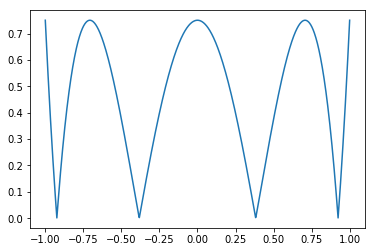

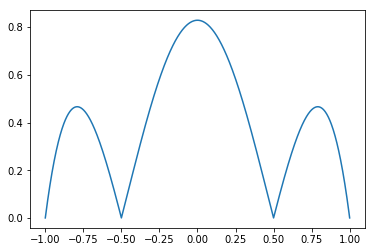

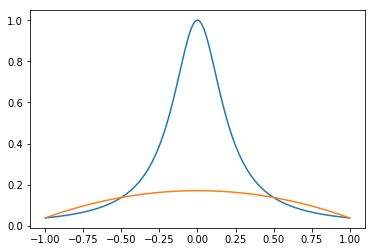

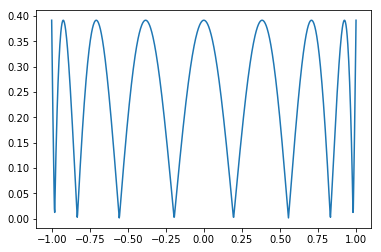

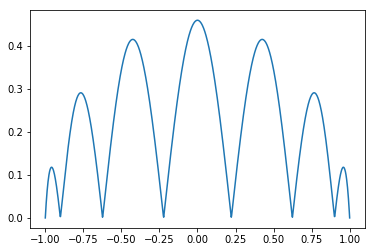

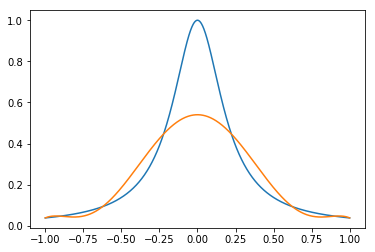

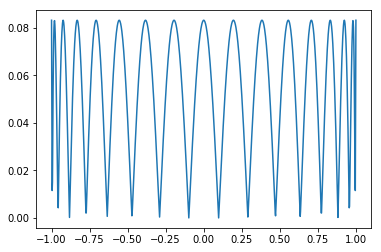

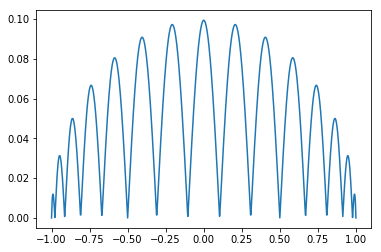

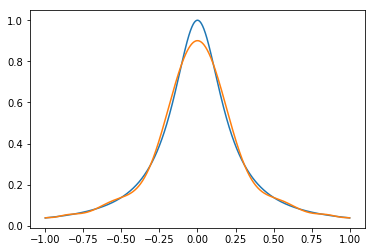

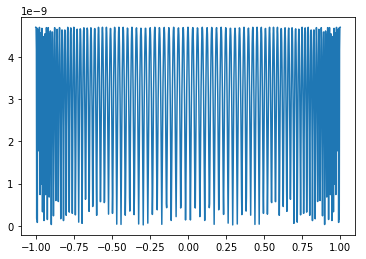

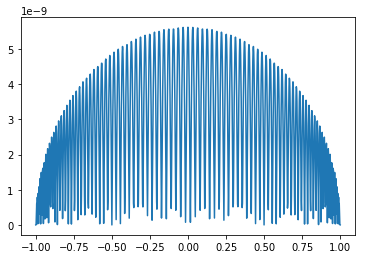

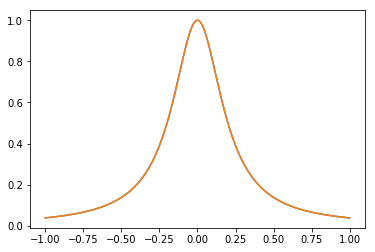

In [6]:
import numpy.polynomial.chebyshev as cheb

nodes_list = [4,8,16,100]

x_interp = np.linspace(-1,1,1001)

for N_nodes in nodes_list:

    nodes_cheb1 = cheb.chebpts1(N_nodes)

    weights_cheb1 = chebweights1(nodes_cheb1)

    nodes_cheb2 = cheb.chebpts2(N_nodes)

    weights_cheb2 = chebweights2(len(nodes_cheb2))

    f = lambda x: 1.0/(1.0 + 25.0*(x**2))

    b_cheb1 = BaryInterp(nodes_cheb1,f(nodes_cheb1),weights_cheb1)

    b_cheb2 = BaryInterp(nodes_cheb2,f(nodes_cheb2),weights_cheb2)
    
    plt.figure()
    plt.plot(x_interp, np.abs(f(x_interp) - b_cheb1.interp_lagrange(x_interp))/f(x_interp))
    
    plt.figure()
    plt.plot(x_interp, np.abs(f(x_interp) - b_cheb2.interp_lagrange(x_interp))/f(x_interp))
    
    plt.figure()
    plt.plot(x_interp, f(x_interp))
    plt.plot(x_interp, b_cheb2.interp_lagrange(x_interp))

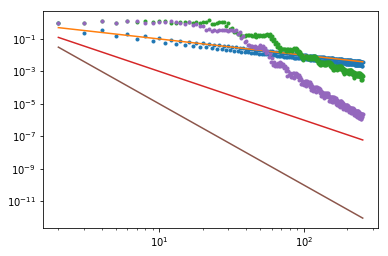

In [7]:
import numpy.polynomial.chebyshev as cheb

x_interp = np.linspace(-1,1,1001)

def f1(x):
    return np.abs(x)
    
def f2(x):
    return np.abs(np.sin(5*np.pi*x))**3
    
def f3(x):
    return np.abs(np.sin(3*np.pi*x))**5

f_val = np.array([f1(x_interp),f2(x_interp),f3(x_interp)])
f = [f1, f2, f3]


error_interp = np.zeros([3, 255])

for N_nodes in range(2, 257, 1):  #number of nodes go from 1 to 256
    
    nodes_cheb2 = cheb.chebpts2(N_nodes)
    weights_cheb2 = chebweights2(len(nodes_cheb2))
    
    for i in range(3):

        b_cheb2 = BaryInterp(nodes_cheb2, f[i](nodes_cheb2), weights_cheb2)

        error_interp[i, N_nodes - 2] = np.amax(np.abs(f_val[i,:] - b_cheb2.interp_lagrange(x_interp)))
    

for i in range(3):

    plt.loglog(np.array(range(2,257,1)),error_interp[i],'.')
    plt.loglog(np.array(range(2,257,1)),1/(np.array(range(2,257,1)))**(2*i+1),'-')
        

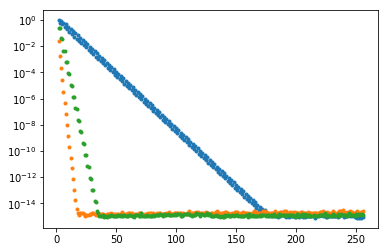

In [8]:
import numpy.polynomial.chebyshev as cheb

x_interp = np.linspace(-1,1,10001)

def f1(x):
    return 1.0/(1.0 + 25.0*(x**2))
    
def f2(x):
    return np.sqrt(x + 3)
    
def f3(x):
    return np.tan(x)

f_val = np.array([f1(x_interp),f2(x_interp),f3(x_interp)])
f = [f1, f2, f3]


error_interp = np.zeros([3, 255])

for N_nodes in range(2, 257, 1):  #number of nodes go from 1 to 256
    
    nodes_cheb2 = cheb.chebpts2(N_nodes)
    weights_cheb2 = chebweights2(len(nodes_cheb2))
    
    f_eval = [f[0](nodes_cheb2), f[1](nodes_cheb2), f[2](nodes_cheb2)]
    
    for i in range(3):

        b_cheb2 = BaryInterp(nodes_cheb2, f_eval[i], weights_cheb2)

        error_interp[i, N_nodes - 2] = np.amax(np.abs(f_val[i,:] - b_cheb2.interp_lagrange(x_interp)))
    

for i in range(3):

    plt.semilogy(np.array(range(2,257,1)),error_interp[i],'.')
    #plt.semilogy(1/(np.array(range(2,257,1)))**1,error_interp[i],'.')
        
        

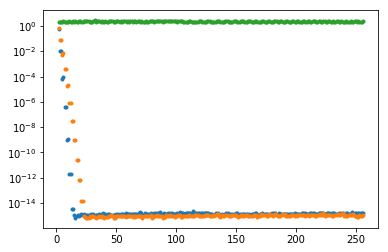

In [9]:
import numpy.polynomial.chebyshev as cheb

x_interp = np.linspace(-1,1,10001)

def f1(x):
    return np.cosh(x)
    
def f2(x):
    return np.exp(-(x**2))
    
def f3(x):
    return np.cos(100*np.pi*x)

f_val = np.array([f1(x_interp),f2(x_interp),f3(x_interp)])
f = [f1, f2, f3]


error_interp = np.zeros([3, 255])

for N_nodes in range(2, 257, 1):  #number of nodes go from 1 to 256
    
    nodes_cheb2 = cheb.chebpts2(N_nodes)
    weights_cheb2 = chebweights2(len(nodes_cheb2))
    
    f_eval = [f[0](nodes_cheb2), f[1](nodes_cheb2), f[2](nodes_cheb2)]
    
    for i in range(3):

        b_cheb2 = BaryInterp(nodes_cheb2, f_eval[i], weights_cheb2)

        error_interp[i, N_nodes - 2] = np.amax(np.abs(f_val[i,:] - b_cheb2.interp_lagrange(x_interp)))
    

for i in range(3):

    plt.semilogy(np.array(range(2,257,1)),error_interp[i],'.')
    #plt.semilogy(1/(np.array(range(2,257,1)))**1,error_interp[i],'.')